# Teacher Ratings 

In this notebook, I use the teaching ratings dataset from the "An Introduction to Statistical Learning" textbook in an attempt to predict a teacher's evaulation score. Specifically, I am attempting to estimate a teachers score based on their age and beauty.

 **NOTE**: course_eval and nnenglish were swapped in the csv file. This was due to a bug with Jupyter that I could not fix any other way. 

In [1]:
# pandas for data manipulation
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy
import scipy
import seaborn

from pandas.plotting import scatter_matrix

In [2]:
myNames = ['Minority', 'Age', 'Female', 'Credits', 'Beauty', 'Native English', 'Intro Course', 'Course Evaluations']

data = pd.read_csv('TeachingRatings.csv', skiprows=1, names=myNames)

In [3]:
# data information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
Minority              463 non-null int64
Age                   463 non-null int64
Female                463 non-null int64
Credits               463 non-null int64
Beauty                463 non-null float64
Native English        463 non-null int64
Intro Course          463 non-null int64
Course Evaluations    463 non-null float64
dtypes: float64(2), int64(6)
memory usage: 29.1 KB
None


In [4]:
print(data.describe())

         Minority         Age      Female     Credits        Beauty  \
count  463.000000  463.000000  463.000000  463.000000  4.630000e+02   
mean     0.138229   48.365011    0.421166    0.058315  6.263499e-08   
std      0.345513    9.802742    0.494280    0.234592  7.886477e-01   
min      0.000000   29.000000    0.000000    0.000000 -1.450494e+00   
25%      0.000000   42.000000    0.000000    0.000000 -6.562689e-01   
50%      0.000000   48.000000    0.000000    0.000000 -6.801430e-02   
75%      0.000000   57.000000    1.000000    0.000000  5.456024e-01   
max      1.000000   73.000000    1.000000    1.000000  1.970023e+00   

       Native English  Intro Course  Course Evaluations  
count      463.000000    463.000000          463.000000  
mean         0.060475      0.339093            3.998272  
std          0.238623      0.473913            0.554866  
min          0.000000      0.000000            2.100000  
25%          0.000000      0.000000            3.600000  
50%         

## Plots

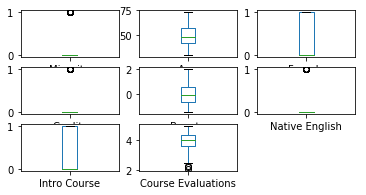

In [5]:
data.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

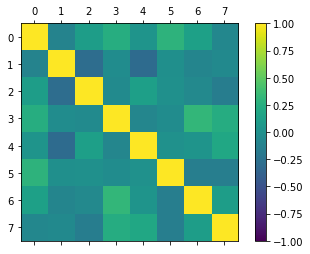

In [6]:
# correlation matrix plot
correlations = data.corr()

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

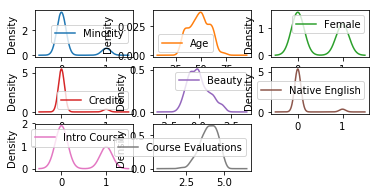

In [7]:
# univariate density plots
data.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

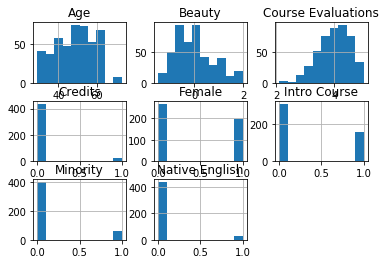

In [8]:
# univariate histograms
data.hist()
plt.show()

# Testing Algorithms

### Preping Data

In [9]:
data = data.astype(float)

array = data.values

X = data.drop('Course Evaluations',axis=1)
X = X.drop('Minority',axis=1)
X = X.drop('Female' ,axis=1)
X = X.drop('Credits',axis=1)
X = X.drop('Native English', axis=1)
X = X.drop('Intro Course',axis = 1)

Y = data['Course Evaluations']
print(X)
print(Y)

      Age    Beauty
0    36.0  0.289916
1    59.0 -0.737732
2    51.0 -0.571984
3    40.0 -0.677963
4    31.0  1.509794
..    ...       ...
458  32.0  1.231394
459  32.0  1.231394
460  42.0  0.420400
461  42.0  0.420400
462  42.0  0.420400

[463 rows x 2 columns]
0      4.3
1      4.5
2      3.7
3      4.3
4      4.4
      ... 
458    3.2
459    4.3
460    3.3
461    3.2
462    4.1
Name: Course Evaluations, Length: 463, dtype: float64


In [10]:
import pandas
# from sklearn import cross_validation
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Regression Algorithms

This problem required the use of regression algorithms so multiple regression algorithms were tested

### Regression Trees

In [11]:
from sklearn.tree import DecisionTreeRegressor

instances = len(X)

kfold = model_selection.KFold(10, random_state=7)
model = DecisionTreeRegressor()

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Results of using Regression Trees: ")
print(results.mean())

Results of using Regression Trees: 
-0.2455089398064533


### K Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsRegressor

instances = len(X)

kfold = model_selection.KFold(10, random_state=7)
model = KNeighborsRegressor()

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Results of using K Nearest Neighbors: ")
print(results.mean())

Results of using K Nearest Neighbors: 
-0.33046366327474563


### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

instances = len(X)

kfold = model_selection.KFold(10, random_state=7)
model = LinearRegression()

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Results of using Linear Regression: ")
print(results.mean())

Results of using Linear Regression: 
-0.3040572785520201


### Lasso Lars

In [14]:
from sklearn.linear_model import LassoLars

instances = len(X)

kfold = model_selection.KFold(10, random_state=7)
model = LassoLars()

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Results of using Lasso Lars:")
print(results.mean())

Results of using Lasso Lars:
-0.30964280957370754


### Ridge

In [15]:
from sklearn.linear_model import Ridge

instances = len(X)

kfold = model_selection.KFold(10, random_state=7)
model = Ridge()

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Results of using Ridge:")
print(results.mean())

Results of using Ridge:
-0.30404413408255127


### Lasso

In [16]:
from sklearn.linear_model import Lasso

instances = len(X)

kfold = model_selection.KFold(10, random_state=7)
model = Lasso()

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Results of using Lasso:")
print(results.mean())

Results of using Lasso:
-0.30964280957370754


## Evaluating Regression Models

### R squared

In [17]:
# Linear

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = LinearRegression()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')

print("R squared results for the Linear Model")
print("R^2: %.3f %.3f" % (results.mean(), results.std()))

R squared results for the Linear Model
R^2: -0.029 0.090


In [18]:
# Regression Trees

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = DecisionTreeRegressor()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')

print("R squared results for the Regression Trees")
print("R^2: %.3f %.3f" % (results.mean(), results.std()))

R squared results for the Regression Trees
R^2: 0.169 0.232


In [19]:
# K Nearest Neighbor

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = KNeighborsRegressor()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')

print("R squared results for the K Nearest Neighbor Model")
print("R^2: %.3f %.3f" % (results.mean(), results.std()))

R squared results for the K Nearest Neighbor Model
R^2: -0.117 0.137


In [20]:
# Lasso Lars

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = LassoLars()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')

print("R squared results for the Lasso Lars Model")
print("R^2: %.3f %.3f" % (results.mean(), results.std()))

R squared results for the Lasso Lars Model
R^2: -0.043 0.034


In [21]:
# Ridge

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = Ridge()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')

print("R squared results for the Ridge Model")
print("R^2: %.3f %.3f" % (results.mean(), results.std()))

R squared results for the Ridge Model
R^2: -0.029 0.090


In [22]:
# Lasso

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = Lasso()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')

print("R squared results for the Lasso Model")
print("R^2: %.3f %.3f" % (results.mean(), results.std()))

R squared results for the Lasso Model
R^2: -0.043 0.034


### Mean Absolute Error (MAE)

In [23]:
# Linear

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = LinearRegression()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')

print("Mean Absolute Error results for the Linear Model")
print("MAE: %.3f %.3f" % (results.mean(), results.std()))

Mean Absolute Error results for the Linear Model
MAE: -0.450 0.040


In [24]:
# Regression Trees

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = DecisionTreeRegressor()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')

print("Mean Absolute Error results for the Regression Trees Model")
print("MAE: %.3f %.3f" % (results.mean(), results.std()))

Mean Absolute Error results for the Regression Trees Model
MAE: -0.374 0.046


In [25]:
# K Nearest Neighbors

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model =  KNeighborsRegressor()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')

print("Mean Absolute Error results for the K Nearest Neighbors Model")
print("MAE: %.3f %.3f" % (results.mean(), results.std()))

Mean Absolute Error results for the K Nearest Neighbors Model
MAE: -0.462 0.046


In [26]:
# Lasso Lars

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = LassoLars()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')

print("Mean Absolute Error results for the Lasso Lars Model")
print("MAE: %.3f %.3f" % (results.mean(), results.std()))

Mean Absolute Error results for the Lasso Lars Model
MAE: -0.451 0.039


In [27]:
# Ridge

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = Ridge()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')

print("Mean Absolute Error results for the Ridge Model")
print("MAE: %.3f %.3f" % (results.mean(), results.std()))

Mean Absolute Error results for the Ridge Model
MAE: -0.450 0.040


In [28]:
# Lasso

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = Lasso()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')

print("Mean Absolute Error results for the Lasso Model")
print("MAE: %.3f %.3f" % (results.mean(), results.std()))

Mean Absolute Error results for the Lasso Model
MAE: -0.451 0.039


### Mean Squared Error (MSE)

In [29]:
# Linear

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = LinearRegression()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Mean Squared Error results for the Linear Model")
print("MSE: %.3f %.3f" % (results.mean(), results.std()))

Mean Squared Error results for the Linear Model
MSE: -0.304 0.036


In [30]:
# Regression Tree

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = DecisionTreeRegressor()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Mean Squared Error results for the Regression Tree Model")
print("MSE: %.3f %.3f" % (results.mean(), results.std()))

Mean Squared Error results for the Regression Tree Model
MSE: -0.245 0.074


In [31]:
# K Nearest Neighbors

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = KNeighborsRegressor()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Mean Squared Error results for the K Nearest Neighbors Model")
print("MSE: %.3f %.3f" % (results.mean(), results.std()))

Mean Squared Error results for the K Nearest Neighbors Model
MSE: -0.330 0.051


In [32]:
# Lasso Lars

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = LassoLars()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Mean Squared Error results for the Lasso Lars Model")
print("MSE: %.3f %.3f" % (results.mean(), results.std()))

Mean Squared Error results for the Lasso Lars Model
MSE: -0.310 0.041


In [33]:
# Ridge

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = Ridge()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Mean Squared Error results for the Ridge Model")
print("MSE: %.3f %.3f" % (results.mean(), results.std()))

Mean Squared Error results for the Ridge Model
MSE: -0.304 0.036


In [34]:
# Lasso

instances = len(X)
kfold = model_selection.KFold(10, random_state=7)
model = Lasso()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("Mean Squared Error results for the Lasso Model")
print("MSE: %.3f %.3f" % (results.mean(), results.std()))

Mean Squared Error results for the Lasso Model
MSE: -0.310 0.041


## Preliminary Conclusions

The results from all of the models appear to show low performance across the board. 

Starting with checking the R^2   values: Almost all of the values were below 0.1, except for the Regression tree model which was 0.169. Even though the Regression tree model R^2 score was higher, it is still significantly lower than the max R^2 score of 1. 

The MAE and MSE outputs produced strange results. Typically the closer the results are to zero, the better the model performed. The issue is that the outputs were all **below** zero which should not occur. In light of this: I conclude that **there is not a correlation between a teacher's age and beauty and their evalutation score**. That being said, the Regression tree model performs the best, but still performs poorly. 

## Improving Model Performance

Here we explore some different techniques for improving the performance of the models, though it seems that there are barely any improvements. 

In [35]:
# Randomized Search for Lasso Lars

import pandas
import numpy
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}
rsearch = RandomizedSearchCV(estimator=LassoLars(), param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)

print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.009017752598061179
0.0014268805627581926


In [36]:
# Randomized Search for Ridge

param_grid = {'alpha': uniform()}
rsearch = RandomizedSearchCV(estimator=Ridge(), param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.0126127759497097
0.0014268805627581926


In [37]:
# Randomized Search for Lasso

param_grid = {'alpha': uniform()}
rsearch = RandomizedSearchCV(estimator=Lasso(), param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.012388252715304896
0.0014268805627581926
